# NN 선형회귀
- 데이터 : autompg

## Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

SEED = 42

time: 1.13 ms (started: 2024-06-28 04:56:30 +00:00)


In [ ]:
!pip install --q ipython-autotime
%load_ext autotime

time: 454 µs (started: 2024-06-28 04:56:30 +00:00)


## 데이터 준비

In [ ]:
#!wget https://raw.githubusercontent.com/devdio/flyai_datasets/main/auto-mpg.csv

time: 459 µs (started: 2024-06-28 04:56:30 +00:00)


In [ ]:
autompg = pd.read_csv('/content/auto-mpg.csv')
autompg.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


time: 52.6 ms (started: 2024-06-28 04:56:30 +00:00)


In [ ]:
df = autompg.copy()

time: 1.1 ms (started: 2024-06-28 04:56:30 +00:00)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
time: 33.9 ms (started: 2024-06-28 04:56:30 +00:00)


In [ ]:
df.columns = [col.replace(' ','') for col in df.columns]
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'modelyear', 'origin', 'carname'],
      dtype='object')

time: 6.23 ms (started: 2024-06-28 04:56:31 +00:00)


In [ ]:
pd.unique(df.horsepower.values)

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

time: 8.51 ms (started: 2024-06-28 04:56:31 +00:00)


In [ ]:
df.loc[df['horsepower']=='?','horsepower'] = np.nan

time: 3.01 ms (started: 2024-06-28 04:56:31 +00:00)


In [ ]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
modelyear       0
origin          0
carname         0
dtype: int64

time: 14.4 ms (started: 2024-06-28 04:56:31 +00:00)


In [ ]:
df = df.dropna()

time: 3.29 ms (started: 2024-06-28 04:56:31 +00:00)


In [ ]:
df['horsepower'] = df['horsepower'].astype(int)

time: 2.99 ms (started: 2024-06-28 04:56:31 +00:00)


<ipython-input-56-9ad81b2690be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['horsepower'] = df['horsepower'].astype(int)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   modelyear     392 non-null    int64  
 7   origin        392 non-null    int64  
 8   carname       392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB
time: 11.4 ms (started: 2024-06-28 04:56:31 +00:00)


In [ ]:
df = df.drop(['origin','carname'],axis=1)

time: 5.9 ms (started: 2024-06-28 04:56:31 +00:00)


## train, test 분리

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['mpg'],axis=1),df['mpg'], test_size=0.2, random_state=SEED)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((313, 6), (79, 6), (313,), (79,))

time: 10.1 ms (started: 2024-06-28 04:56:31 +00:00)


## 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_train_s

array([[ 0.30486156,  0.28457757,  0.14142863,  0.75480297,  1.1217589 ,
         0.49452752],
       [-0.87318372, -0.53588042, -0.32949862, -0.49312922, -0.22893966,
        -0.0572982 ],
       [ 0.30486156, -0.23665456, -0.19868549, -0.00252992, -0.37111846,
        -0.33321105],
       ...,
       [-0.87318372, -0.4297035 , -0.51263699, -0.1561399 ,  0.73076722,
         0.49452752],
       [-0.87318372, -0.94128319, -1.0358895 , -0.72175802,  1.83265289,
         1.32226608],
       [ 1.48290683,  1.97375578,  1.18793363,  2.39450014, -0.54884195,
        -0.88503677]])

time: 20 ms (started: 2024-06-28 04:56:31 +00:00)


In [ ]:
y_train = y_train.to_numpy()

time: 717 µs (started: 2024-06-28 04:56:49 +00:00)


In [ ]:
def data_check(a,b):
    print(f'Type : {type(a)}, {type(b)}')
    print(f'Shape : {a.shape}, {b.shape}')

time: 834 µs (started: 2024-06-28 04:58:27 +00:00)


In [ ]:
data_check(X_train_s, y_train)

Type : <class 'numpy.ndarray'>, <class 'numpy.ndarray'>
Shape : (313, 6), (313,)
time: 600 µs (started: 2024-06-28 04:58:35 +00:00)


## model

In [ ]:
X_train_s.shape

(313, 6)

time: 4.34 ms (started: 2024-06-28 05:01:49 +00:00)


In [ ]:
from keras import layers

model = keras.Sequential([
    layers.Dense(units=5, activation='relu', input_shape=(6,)),
    layers.Dense(units=3, activation='relu'),
    layers.Dense(units=1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 35        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 57 (228.00 Byte)
Trainable params: 57 (228.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
time: 384 ms (started: 2024-06-28 05:04:35 +00:00)


In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

time: 15.2 ms (started: 2024-06-28 05:08:53 +00:00)


In [ ]:
EPOCHS = 100
BATCH_SIZE = 16

history = model.fit(X_train_s, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/100
16/16 [==============================] - 1s 17ms/step - loss: 596.3349 - mse: 596.3349 - mae: 23.0925 - val_loss: 676.7050 - val_mse: 676.7050 - val_mae: 24.8174
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 592.7390 - mse: 592.7390 - mae: 23.0126 - val_loss: 672.6774 - val_mse: 672.6774 - val_mae: 24.7373
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 588.5099 - mse: 588.5099 - mae: 22.9203 - val_loss: 668.1542 - val_mse: 668.1542 - val_mae: 24.6470
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 583.7141 - mse: 583.7141 - mae: 22.8162 - val_loss: 663.1956 - val_mse: 663.1956 - val_mae: 24.5489
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 578.5839 - mse: 578.5839 - mae: 22.7036 - val_loss: 657.8029 - val_mse: 657.8029 - val_mae: 24.4415
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 573.0165 - mse: 573.0165 - mae: 22.5802 - val_loss: 651.7429 

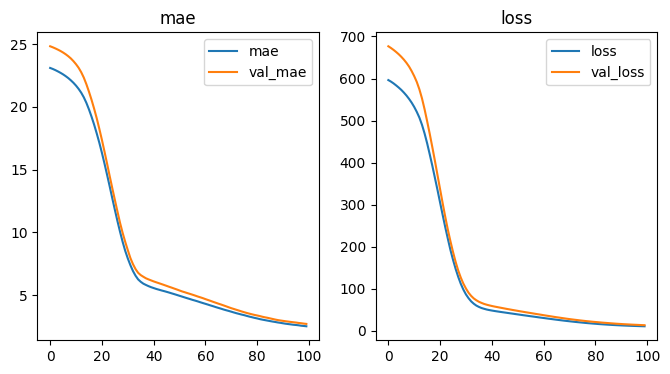

time: 539 ms (started: 2024-06-28 05:16:52 +00:00)


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes = axes.flatten()
sns.lineplot(history.history['mae'], ax=axes[0], label='mae')
sns.lineplot(history.history['val_mae'], ax=axes[0], label='val_mae')
axes[0].legend()
axes[0].set_title('mae')
sns.lineplot(history.history['loss'], ax=axes[1], label='loss')
sns.lineplot(history.history['val_loss'], ax=axes[1], label='val_loss')
axes[1].set_title('loss')
axes[1].legend()
plt.show()

In [ ]:
X_test_s = ss.transform(X_test)
y_test = y_test.to_numpy()
data_check(X_test_s,y_test)

Type : <class 'numpy.ndarray'>, <class 'numpy.ndarray'>
Shape : (79, 6), (79,)
time: 26.1 ms (started: 2024-06-28 05:07:54 +00:00)


In [ ]:
y_pred = model.predict(X_test_s)

3/3 [==============================] - 0s 6ms/step
time: 313 ms (started: 2024-06-28 05:20:00 +00:00)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

10.538282394049771
0.7935313093009718
time: 20.5 ms (started: 2024-06-28 05:25:02 +00:00)


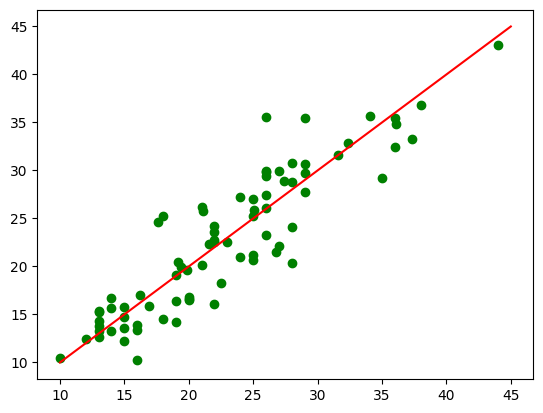

time: 877 ms (started: 2024-06-28 05:29:28 +00:00)


In [ ]:
plt.scatter(y_test,y_pred, color='g')
plt.plot([10,45],[10,45], color='r')
plt.show()